<a href="https://colab.research.google.com/github/Kweku21/waste_product_classification/blob/master/waste_transfer_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow-gpu

In [ ]:
pip install opencv-python

In [ ]:
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
model = tf.keras.models.load_model("/content/drive/My Drive/Dataset/Waste/Model/model_84-0.97.h5")

In [ ]:
CATEGORIES = ["cardboard","glass","metal","paper","plastic","trash"]

In [ ]:
def prepare(filepath):
    IMG_SIZE = 300
    img_array = cv2.imread(filepath)
    plt.imshow(img_array,cmap="gray")
    plt.show()
    img_array = img_array/255.0
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

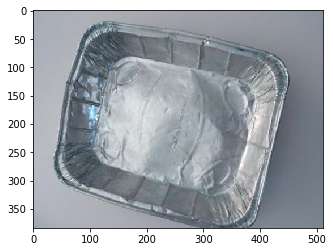

[0.01521588 0.30990165 0.01146491 0.00428327 0.65744126 0.001693  ]
plastic


In [ ]:
prediction = model.predict([prepare('/content/drive/My Drive/Dataset/Waste/test/metal5.jpg')])
print(prediction[0])
# prediction = int(prediction[0][0])
print(CATEGORIES[np.argmax(prediction[0], axis=-1)])

Predicted shape (1, 6)
Maximum Probability:  0.5310321
[0.01069512 0.04845869 0.34264424 0.00702109 0.06014874 0.5310321 ]
Classified: trash


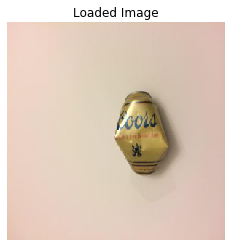

In [ ]:
from tensorflow.keras.preprocessing import image

labels = {0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}

img_path = '/content/drive/My Drive/Dataset/Waste/test/metal4.jpg'

img = image.load_img(img_path, target_size=(300, 300))
img = image.img_to_array(img, dtype=np.uint8)
img=np.array(img)/255.0

plt.title("Loaded Image")
plt.axis('off')
plt.imshow(img.squeeze())

p=model.predict(img[np.newaxis, ...])

# print(p)

print("Predicted shape",p.shape)
print("Maximum Probability: ",np.max(p[0], axis=-1))
predicted_class = labels[np.argmax(p[0], axis=-1)]
print(p[0])
print("Classified:",predicted_class)


-------------------Individual Probability--------------------------------

CARDBOARD : 1.07 %
GLASS : 4.85 %
METAL : 34.26 %
PAPER : 0.7 %
PLASTIC : 6.01 %
TRASH : 53.1 %


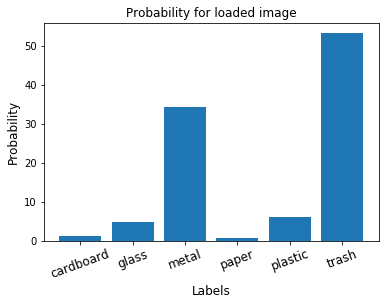

In [ ]:
classes=[]
prob=[]
print("\n-------------------Individual Probability--------------------------------\n")

for i,j in enumerate (p[0],0):
    print(labels[i].upper(),':',round(j*100,2),'%')
    classes.append(labels[i])
    prob.append(round(j*100,2))
    
def plot_bar_x():
    # this is for plotting purpose
    index = np.arange(len(classes))
    plt.bar(index, prob)
    plt.xlabel('Labels', fontsize=12)
    plt.ylabel('Probability', fontsize=12)
    plt.xticks(index, classes, fontsize=12, rotation=20)
    plt.title('Probability for loaded image')
    plt.show()
plot_bar_x()